In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

#### 1.1 Finding closest centroids

In [41]:
def find_closest_centroids(x, centroids):
    k=centroids.shape[0]
    print('k= ',k)
    idx = np.zeros(X.shape[0], dtype=int)
   
    print(idx.shape)
    m = X.shape[0]
    print('m= ',m)
    for i in range(m):
        distances = []
       
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            
            distances.append(norm_ij)
        idx[i] = np.argmin(distances)
     ### END CODE HERE ###
    
    return idx

In [10]:
X = load_data()

In [12]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [22]:
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)

k=  3
idx=  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(300,)
m=  300
0
0   1.981178002041907
1   4.907925457663594
2   6.170412024053506
1
0   3.2105972663230307
1   2.820702783295523
2   2.3499462509952416
2
0   3.365171876090534
1   1.33813946654494
2   2.373852261323399
3
0   1.6150588004146713
1   4.050768322520906
2   5.1107174862951465
4
0   1.9537152467976249
1   4.0379346735648705
2   4.768399677270132
5
0   2.6086435107

AssertionError: Wrong shape. Expected: (6,) got: (300,)

In [27]:
def compute_centroids(X, idx, K):
     m, n = X.shape
     print(m," ",n)
     centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
     for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis = 0)
    ### END CODE HERE ## 
    
     return centroids

In [29]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)

300   2
The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
7   2
6   2
All tests passed!


In [31]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
k=  3
idx=  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(300,)
m=  300
0
0   1.981178002041907
1   4.907925457663594
2   6.170412024053506
1
0   3.2105972663230307
1   2.820702783295523
2   2.3499462509952416
2
0   3.365171876090534
1   1.33813946654494
2   2.373852261323399
3
0   1.6150588004146713
1   4.050768322520906
2   5.1107174862951465
4
0   1.9537152467976249
1   4.0379346735648705
2   4.768399677270

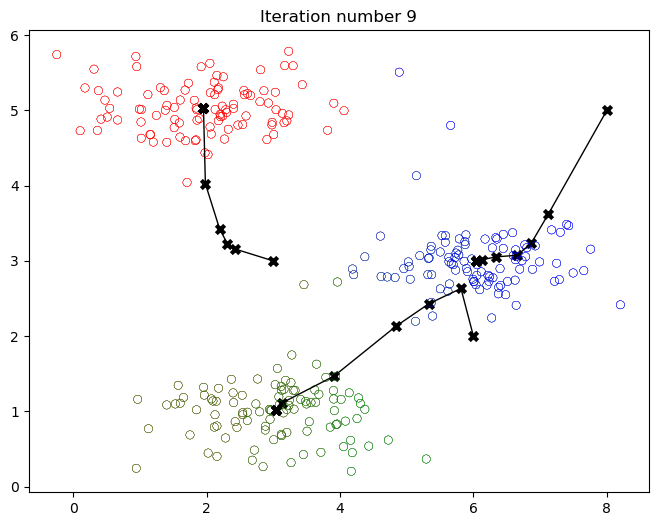

In [33]:
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [39]:
def kMeans_init_centroids(X, K):
       """
        This function initializes K centroids that are to be 
        used in K-Means on the dataset X
        
        Args:
            X (ndarray): Data points 
            K (int):     number of centroids/clusters
        
        Returns:
            centroids (ndarray): Initialized centroids
       """
        
        # Randomly reorder the indices of examples
       randidx = np.random.permutation(X.shape[0])
        
        # Take the first K examples as centroids
       centroids = X[randidx[:K]]
        
       return centroids

K-Means iteration 0/9
k=  3
(300,)
m=  300
300   2
K-Means iteration 1/9
k=  3
(300,)
m=  300
300   2
K-Means iteration 2/9
k=  3
(300,)
m=  300
300   2
K-Means iteration 3/9
k=  3
(300,)
m=  300
300   2
K-Means iteration 4/9
k=  3
(300,)
m=  300
300   2
K-Means iteration 5/9
k=  3
(300,)
m=  300
300   2
K-Means iteration 6/9
k=  3
(300,)
m=  300
300   2
K-Means iteration 7/9
k=  3
(300,)
m=  300
300   2
K-Means iteration 8/9
k=  3
(300,)
m=  300
300   2
K-Means iteration 9/9
k=  3
(300,)
m=  300
300   2


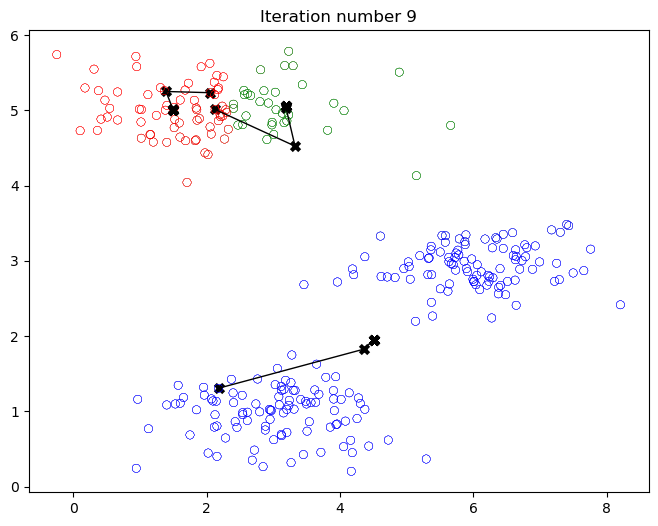

In [47]:
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [49]:
print(centroids)

[[1.49535561 5.00052648]
 [3.19694705 5.0578483 ]
 [4.51321226 1.95570575]]
